<a href="https://colab.research.google.com/github/captain7oxic/Titanic-Survival-Predictions/blob/master/Titanic_Ml_with_disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [0]:
train_df = pd.read_csv('train.csv')

In [0]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

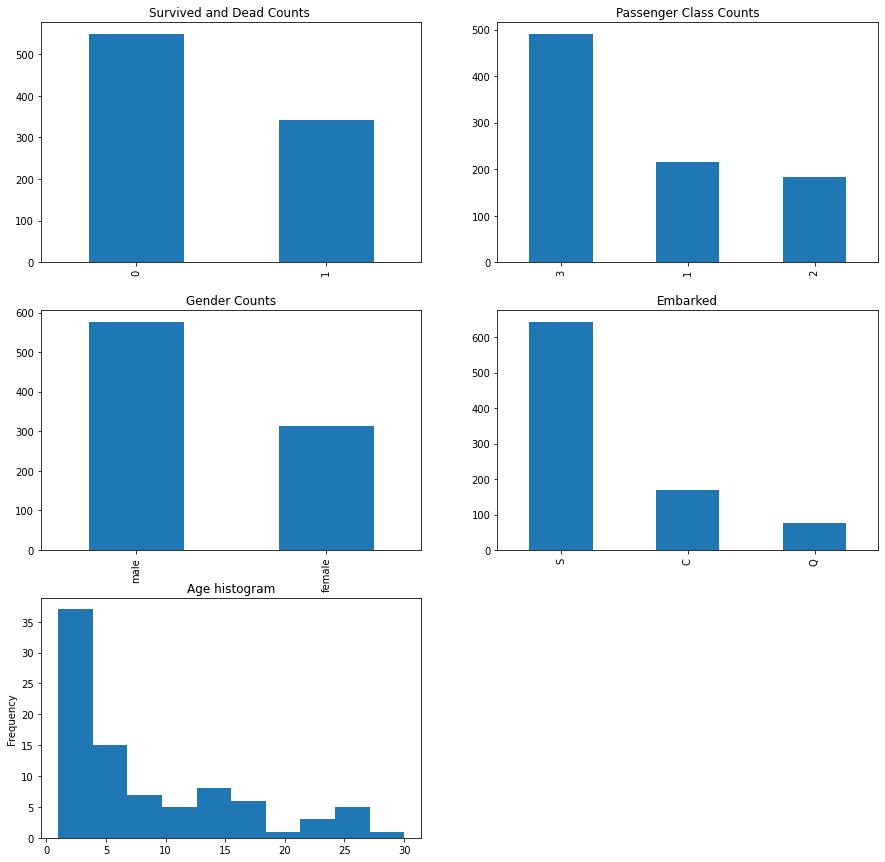

In [0]:
figur = plt.figure(figsize = (15,15))

fig_dim = (3,2)
plt.subplot2grid(fig_dim,(0,0))
train_df['Survived'].value_counts().plot(kind = 'bar',title = 'Survived and Dead Counts ')

plt.subplot2grid(fig_dim,(0,1))
train_df['Pclass'].value_counts().plot(kind = 'bar',title = 'Passenger Class Counts')

plt.subplot2grid(fig_dim,(1,0))
train_df['Sex'].value_counts().plot(kind = 'bar',title = "Gender Counts")

plt.subplot2grid(fig_dim,(1,1))
train_df['Embarked'].value_counts().plot(kind = 'bar',title = "Embarked")

plt.subplot2grid(fig_dim,(2,0))
train_df["Age"].value_counts().plot(kind = 'hist',title = "Age histogram")

In [0]:
pClassDataFrame = pd.crosstab(train_df['Pclass'],train_df['Survived'])

In [0]:
pClassDataFrame

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0, 0.5, 'Survival Rate')

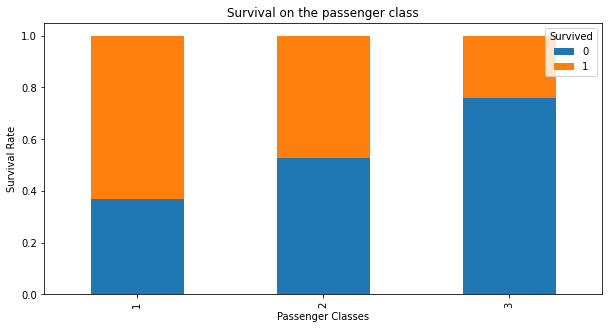

In [0]:
# Normalize the cross tab to sum to 1:
pclass_pd = pClassDataFrame.div(pClassDataFrame.sum(1).astype(float), axis=0)

pclass_pd.plot(figsize = (10,5),kind = 'bar',stacked = True,title = 'Survival on the passenger class')

plt.xlabel('Passenger Classes')
plt.ylabel('Survival Rate')

In [0]:
gender = sorted(train_df['Sex'].unique())
gender_mapping = dict(zip(gender,range(0,len(gender)+1)))

In [0]:
gender_mapping

{'female': 0, 'male': 1}

In [0]:
train_df['Gender_val'] = train_df['Sex'].map(gender_mapping).astype(int)
gender_val = pd.crosstab(train_df['Gender_val'],train_df['Survived'])
gender_val

Survived,0,1
Gender_val,,
0,81,233
1,468,109


Text(0, 0.5, 'Survival Rates')

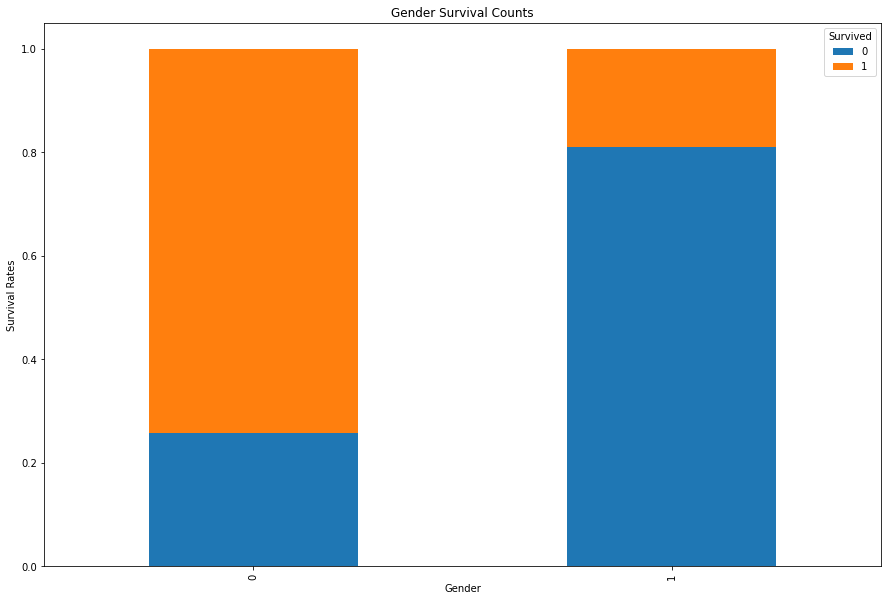

In [0]:
#normalize counts to float
gender_val_norm = gender_val.div(gender_val.sum(1).astype(float),axis =0)
gender_val_norm.plot(figsize = (15,10),kind ='bar',stacked=True,title = "Gender Survival Counts")
plt.xlabel("Gender")
plt.ylabel("Survival Rates")

#determining survival rates on the basis of both sex and passenger class.



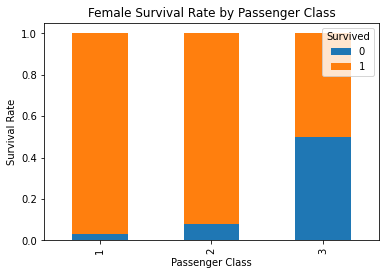

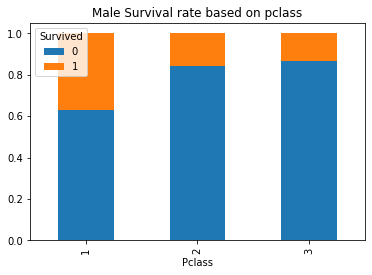

In [0]:

# Plot survival rate by Sex
females_df = train_df[train_df['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], train_df['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')


males_df = train_df[train_df["Sex"]=='male']
males_xt = pd.crosstab(males_df['Pclass'],train_df['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float),axis = 0)
males_xt_pct.plot(kind = 'bar',stacked =True,title = 'Male Survival rate based on pclass')

In [0]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

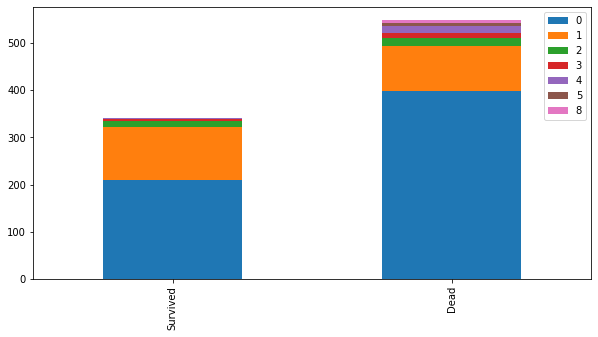

In [0]:
bar_chart('SibSp')

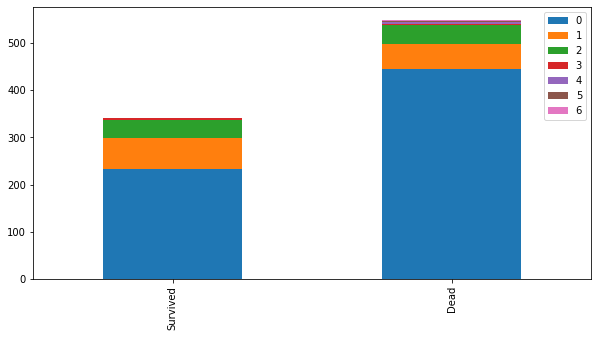

In [0]:
bar_chart('Parch')

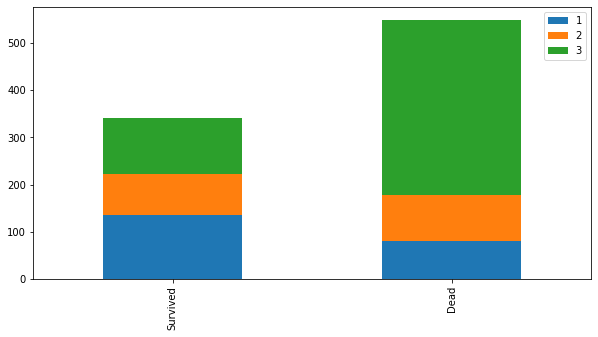

In [0]:
bar_chart('Pclass')

In [0]:
test_df = pd.read_csv('test.csv')

In [0]:

# delete unnecessary feature from dataset
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

In [0]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_val
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1


In [0]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
gender = sorted(test_df['Sex'].unique())
gender_mapping = dict(zip(gender,range(0,len(gender)+1)))

In [0]:
test_df['Gender_val'] = test_df['Sex'].map(gender_mapping).astype(int)


In [0]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_val
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,0


In [0]:
#filling up the NaN values with the mean of the age
train_df['Age'].fillna(train_df['Age'].mean(),inplace = True)
test_df['Age'].fillna(test_df['Age'].mean(),inplace = True)

In [0]:
train_test_df=[train_df,test_df]

In [0]:
type(train_test_df)

list

In [0]:
train_test_df

[     PassengerId  Survived  Pclass     Sex  ...     Fare  Cabin  Embarked Gender_val
 0              1         0       3    male  ...   7.2500    NaN         S          1
 1              2         1       1  female  ...  71.2833    C85         C          0
 2              3         1       3  female  ...   7.9250    NaN         S          0
 3              4         1       1  female  ...  53.1000   C123         S          0
 4              5         0       3    male  ...   8.0500    NaN         S          1
 ..           ...       ...     ...     ...  ...      ...    ...       ...        ...
 886          887         0       2    male  ...  13.0000    NaN         S          1
 887          888         1       1  female  ...  30.0000    B42         S          0
 888          889         0       3  female  ...  23.4500    NaN         S          0
 889          890         1       1    male  ...  30.0000   C148         C          1
 890          891         0       3    male  ...   7.7

Binning

Binning/Converting Numerical Age to Categorical Variable

feature vector map:


child: 0
young: 1
adult: 2
mid-age: 3
senior: 4

In [0]:
for dataset in train_test_df:
  dataset.loc[dataset['Age']<=16,'Age']=0,
  dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age']=1,
  dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),'Age']=2,
  dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62) ,'Age']=3,
  dataset.loc[dataset['Age']>62,'Age']=4


In [0]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_val
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,S,1


In [0]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_val
0,892,3,male,2.0,0,0,330911,7.8292,NaN,Q,1
1,893,3,female,3.0,1,0,363272,7.0000,NaN,S,0
2,894,2,male,3.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,male,2.0,0,0,315154,8.6625,NaN,S,1
4,896,3,female,1.0,1,1,3101298,12.2875,NaN,S,0


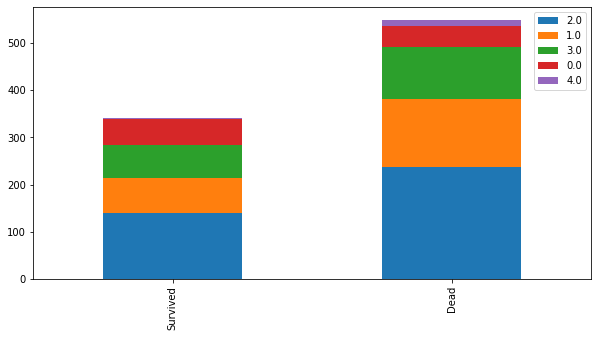

In [0]:
bar_chart('Age')

In [0]:
for dataset in train_test_df:
  dataset['Embarked']=dataset['Embarked'].fillna('S')

In [0]:
embarked_mapping={'S':0,'C':1,'Q':2}
for dataset in train_test_df:
  dataset['Embarked']= dataset['Embarked'].map(embarked_mapping)

In [0]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_val
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,1,0
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,0,0
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,0,1


In [0]:
for dataset in train_test_df:
  dataset['Cabin']=dataset['Cabin'].str[:1]

In [0]:
cabin_mapping = {'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2.0,'G':2.4,'T':2.4}
for dataset in train_test_df:
  dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

for dataset in train_test_df:
  dataset['Cabin'] = dataset['Cabin'].fillna(dataset['Cabin'].median())

In [0]:
train_df.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_val
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,0.8,0,1
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,0.8,1,0
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,0.8,0,0
3,4,1,1,female,2.0,1,0,113803,53.1000,0.8,0,0
4,5,0,3,male,2.0,0,0,373450,8.0500,0.8,0,1
5,6,0,3,male,2.0,0,0,330877,8.4583,0.8,2,1
6,7,0,1,male,3.0,0,0,17463,51.8625,1.6,0,1
7,8,0,3,male,0.0,3,1,349909,21.0750,0.8,0,1
8,9,1,3,female,2.0,0,2,347742,11.1333,0.8,0,0
9,10,1,2,female,0.0,1,0,237736,30.0708,0.8,1,0


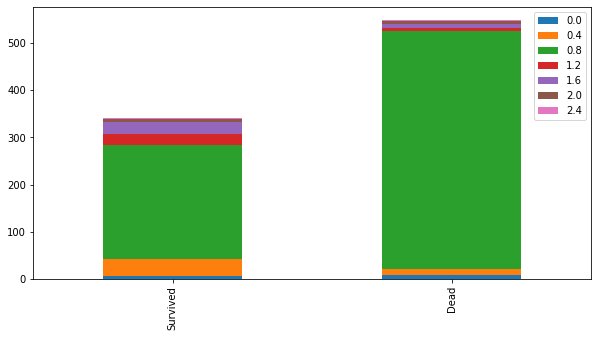

In [0]:
bar_chart('Cabin')

In [0]:
train_df.drop('Ticket', axis =1, inplace=True)
test_df.drop('Ticket',axis=1,inplace=True)

In [0]:
train_df.drop('Fare',axis=1,inplace=True)
test_df.drop('Fare',axis=1,inplace=True)

In [0]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Gender_val
0,1,0,3,male,1.0,1,0,0.8,0,1
1,2,1,1,female,3.0,1,0,0.8,1,0
2,3,1,3,female,1.0,0,0,0.8,0,0
3,4,1,1,female,2.0,1,0,0.8,0,0
4,5,0,3,male,2.0,0,0,0.8,0,1


In [0]:
train_df['Family_size']=train_df['SibSp']+train_df['Parch']+1
test_df['Family_size']=test_df['SibSp']+test_df['Parch']+1


In [0]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_df:
  dataset['Family_size']=dataset['Family_size'].map(family_mapping)

In [0]:
drop_list = ['Parch','SibSp','Sex','PassengerId']
train_df.drop(drop_list,axis=1,inplace=True)
test_df.drop(drop_list,axis=1, inplace=True)


In [0]:
train_df.head()

,Survived,Pclass,Age,Cabin,Embarked,Gender_val,Family_size
0,0,3,1.0,0.8,0,1,0.4
1,1,1,3.0,0.8,1,0,0.4
2,1,3,1.0,0.8,0,0,0.0
3,1,1,2.0,0.8,0,0,0.4
4,0,3,2.0,0.8,0,1,0.0


#Modelling


In [0]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null int64
Gender_val     891 non-null int64
Family_size    891 non-null float64
dtypes: float64(3), int64(4)
memory usage: 48.9 KB


#K-Folding

In [0]:
target = train_df['Survived']
train_data = train_df.drop('Survived', axis = 1,inplace=True)


In [0]:
train_df.head()

,Pclass,Age,Cabin,Embarked,Gender_val,Family_size
0,3,1.0,0.8,0,1,0.4
1,1,3.0,0.8,1,0,0.4
2,3,1.0,0.8,0,0,0.0
3,1,2.0,0.8,0,0,0.4
4,3,2.0,0.8,0,1,0.0


In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [0]:
clf = [KNeighborsClassifier(n_neighbors=13),DecisionTreeClassifier(),ExtraTreeClassifier(),RandomForestClassifier(n_estimators=13),ExtraTreeClassifier(),BaggingClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),SVC()]
def model_fit():
  scoring = 'accuracy'
  for i in range(len(clf)):
      score = cross_val_score(clf[i], train_df, target, cv=k_fold, n_jobs=1, scoring=scoring)
      print('Score of Model:',i,":",round(np.mean(score)*100,2))

In [0]:
model_fit()

Score of Model: 0 : 81.71
Score of Model: 1 : 80.02
Score of Model: 2 : 78.9
Score of Model: 3 : 80.58
Score of Model: 4 : 78.79
Score of Model: 5 : 78.79
Score of Model: 6 : 81.03
Score of Model: 7 : 80.36
Score of Model: 8 : 82.04


#SVC Gives the Best result 

In [0]:
clf1=SVC()
clf1.fit(train_df,target)
prediction = clf1.predict(test_df)


In [0]:
test_df.head()

,Pclass,Age,Cabin,Embarked,Gender_val,Family_size
0,3,2.0,0.8,2,1,0.0
1,3,3.0,0.8,0,0,0.4
2,2,3.0,0.8,2,1,0.0
3,3,2.0,0.8,0,1,0.0
4,3,1.0,0.8,0,0,0.8


In [0]:
submission_df=pd.read_csv('test.csv')


In [0]:
submission_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
submission_df['Survived']= prediction

In [0]:
drop_list2=['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
submission_df.drop(drop_list2,axis=1,inplace=True)

In [0]:
submission_df.to_csv('submission.csv')